In [1]:
import numpy as np

In [2]:
# matrica A

A = np.array([[1, 2, 3], 
             [4, 5, 6]])

In [3]:
# transponujemo 
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
# A.T x A 
A.T.dot(A)

array([[17, 22, 27],
       [22, 29, 36],
       [27, 36, 45]])

In [5]:
b = np.array([1, 2, 1])

In [6]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
from numpy import linalg as LA

In [8]:
LA.det(np.eye(2))

1.0

In [9]:
LA.cond(np.eye(2))

1.0


Zadatak 1

Odrediti koeficijente w0 i w1 tako da funkcija 𝑓(𝑥)=w0+w1𝑥 u smislu metode najmanjih kvadrata najbolje aproksimira skup tačaka (0,1.2), (0.5,2.05), (1,2.9) i (−0.5,0.1) u ravni.

In [10]:
xs = np.array([0, 0.5, 1, -0.5])
ys = np.array([1.2, 2.05, 2.9, 0.1])


# Output: 
# array([[1., 1., 1., 1.],
#        [2., 3., 4., 5.]]).T
A = np.vstack((np.ones(4), xs)).T

# Resavanje metodom najmanjih kvadrata
# w - rezultat
# residuals - treba da bude sto blizi 0
w, residuals, _, _ = LA.lstsq(a=A, b=ys, rcond=None)

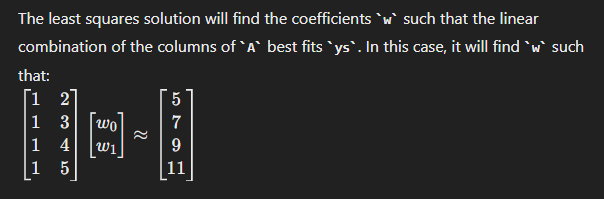

In [11]:
# f(x) = w0 + w1x
w

array([1.1 , 1.85])

In [12]:
A

array([[ 1. ,  0. ],
       [ 1. ,  0.5],
       [ 1. ,  1. ],
       [ 1. , -0.5]])

In [13]:
b

array([1, 2, 1])

In [14]:
A + np.ones(2)

array([[2. , 1. ],
       [2. , 1.5],
       [2. , 2. ],
       [2. , 0.5]])


Zadatak 2

Odrediti vrednosti koeficijenata 𝑎 i 𝑏 tako da funkcija 𝑓(𝑥)=𝑎+𝑏sin𝑥 u smislu metode najmanjih kvadrata aproksimira skup tacaka (2,2.6), (−1.22,−1.7), (8.32,2.5) i (4.23,−1.6) u ravni. Dati ocenu greske. Prikazati skup tačaka i nacrtati rezultujucu funkciju.

In [15]:
xs = np.array([2, -1.22, 8.32, 4.23])
ys = np.array([2.6, -1.7, 2.5, -1.6])

A = np.vstack((np.ones(4), np.sin(xs))).T

w, residuals, _, _ = LA.lstsq(a=A, b=ys, rcond=None)

In [16]:
from matplotlib import pyplot as plt

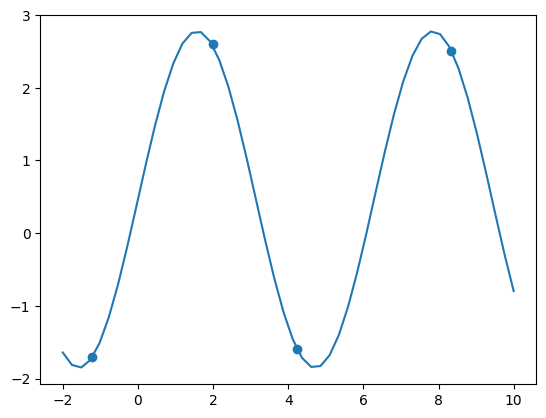

In [17]:
plt.scatter(xs, ys)
x_plot = np.linspace(-2, 10)
plt.plot(x_plot, w[0] + w[1]*np.sin(x_plot))


Zadatak 3

Svaki red u fajlu advertising.csv sadrži informacije o cenama u hiljadama dolara reklamnih usluga na određenom tržištu. Prva kolona se odnosi na cene reklamiranja na televiziji, druga na radiju, a treća u novinama. Četvrta kolona se odnosi na ukupnu prodaju proizvoda koji su se reklamirali na datim medijima. Kreirati linearni model koji predviđa prodaju na osnovu cena reklamiranja.


In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


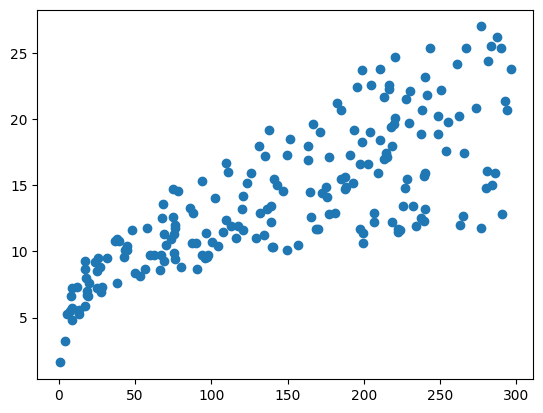

In [20]:
plt.scatter(df['TV'], df['Sales'])

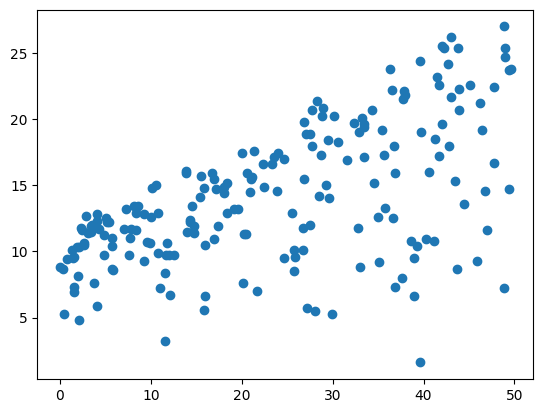

In [21]:
plt.scatter(df['Radio'], df['Sales'])

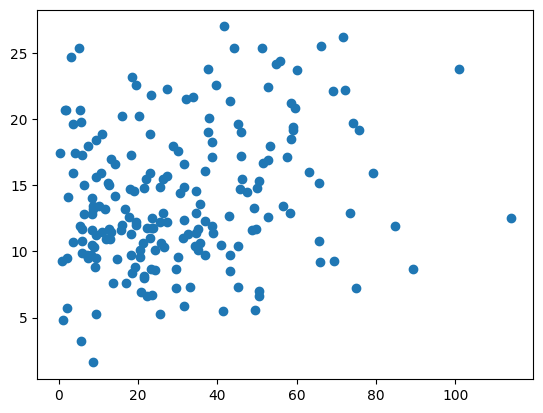

In [22]:
plt.scatter(df['Newspaper'], df['Sales'])


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
model = LinearRegression()

In [25]:
X = df.drop(['Sales'], axis=1)
y = df['Sales'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [30]:
model.coef_

array([ 3.7426909 ,  2.91709384, -0.04495865])

In [31]:
model.intercept_


13.913125

Zadatak 3

U datoteci social_reach.csv se nalaze cene reklamiranja za različite demografske grupe, koje su date u hiljadama evra za 1000 pregleda. Svaka od tri kolone označava različitu platformu za reklamiranje (na primer, platforme mogu biti Facebook, Instagram ili YouTube). Svaki red označava različitu demografsku grupu, koja može npr. biti posebna država u kojoj se reklama plasira. Potrebno je odrediti iznos sredstava da se ostvari približno milion pregleda za svaku demografsku grupu, gledajući po svim platformama ukupno.

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('social_reach.csv')
df

,web1,web2,web3
0,0.97,1.86,0.41
1,1.23,2.18,0.53
2,0.80,1.24,0.62
3,1.29,0.98,0.51
4,1.10,1.23,0.69
5,0.67,0.34,0.54
6,0.87,0.26,0.62
7,1.10,0.16,0.48
8,1.92,0.22,0.71
9,1.29,0.12,0.62
